In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (15, 7)

In [3]:
# Regular data
tx = pd.read_csv("./data/data_scales/TX/tx_long.csv")

# T0 data (One off tests)
aist  = pd.read_csv("./data/data_scales/T0/aist.csv")         # AIST/General Interest Scale
bfi   = pd.read_csv("./data/data_scales/T0/bfi.csv")          # BFI/Big-5 Personality
bg    = pd.read_csv("./data/data_scales/T0/background.csv")   # Background data
iq    = pd.read_csv("./data/data_scales/T0/iq.csv")           # IQ Test
kont  = pd.read_csv("./data/data_scales/T0/kont.csv")         # Internal and External Controll
math  = pd.read_csv("./data/data_scales/T0/math_test.csv")    # Maths ability
mot   = pd.read_csv("./data/data_scales/T0/motivation.csv")   # Motivation questionnaire
panas = pd.read_csv("./data/data_scales/T0/panas.csv")        # Positive and Negative Affect Scale

tx    = pd.read_csv("./data/data_scales/TX/tx_long.csv")      # Surveys

In [21]:
tx.head()

,studentID,meas,Iv1_state,Av1_state,Uv1_state,Co1_state,Co2_state,Angst_abbruch_state,Angst_scheitern_state,Leist_verstehen_state,...,PANN09_state,Block2_lerngruppe_state,Block2_abschreiben_state,Block2_durchhaltevermoegen_state,Block2_vorNachbereitung_state,Block2_zeitaufwand_state,Block2_anwesenheit_state,Block2_gruppe_state,Summe,event
0,student1,8,3.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,student1,10,3.0,3.0,2.0,2.0,3.0,1.0,2.0,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,student1,12,3.0,2.0,3.0,2.0,2.0,1.0,2.0,4.0,...,4.0,4.0,4.0,2.0,3.0,8.0,3.0,1.0,89.0,0
3,student1,15,4.0,3.0,3.0,2.0,2.0,4.0,4.0,3.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,student1,17,3.0,2.0,3.0,3.0,4.0,1.0,2.0,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data Preprocessing

In [4]:
# unique values of tx['meas']
print(tx['meas'].unique(), tx['meas'].nunique())

[  8  10  12  15  17  19  22  24  26  29  31  33  36  38  40  43  45  47
  54  61  68  96  50  52  80  92 103 106 110  57  59  64  66  73  85  87
  89  94  99 101 108 113 115 117 120 122 124 127 129 131] 50


In [5]:
# data grouping
tx_event0 = tx[tx['event'] == 0]
# the proportion of the number of rows for each tx variable is NaN by the number of tx rows
tx_event0.isnull().sum() / tx_event0.shape[0]
# proportion larger than 0.5
tx_event0.columns[tx_event0.isnull().sum() / tx_event0.shape[0] > 0.5]

Index(['Block2_lerngruppe_state', 'Block2_abschreiben_state',
       'Block2_durchhaltevermoegen_state', 'Block2_vorNachbereitung_state',
       'Block2_zeitaufwand_state', 'Block2_anwesenheit_state',
       'Block2_gruppe_state', 'Summe'],
      dtype='object')

Maybe we shouldn't use block2 variables

In [6]:
# change studentID: student1 -> 1
tx_event0['studentID'] = tx_event0['studentID'].str.replace('student', '').astype(int)

# use linear interpolation to fill in the missing values tx_event0 NAN
tx_event0 = tx_event0.interpolate(method='linear')

observed_vars = [
    'Iv1_state', 'Av1_state', 'Uv1_state', 'Co1_state', 'Co2_state',
    'Angst_abbruch_state', 'Angst_scheitern_state', 'Leist_verstehen_state',
    'Leist_bearbeiten_state', 'Leist_stress_state', 'Leist_ueberfordert_state',
    'Wiss_kommilitonen_state', 'Wiss_mathe_state', 'PANP01_state', 'PANP05_state',
    'PANP08_state', 'PANN01_state', 'PANN05_state', 'PANN09_state'
]
# select columns of tx_event0: meas, studentID, observed_vars, event
tx_event0 = tx_event0[['meas', 'studentID', 'event'] + observed_vars]
tx_event0.head()



C:\Users\15524\AppData\Local\Temp\ipykernel_7720\3063713430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_event0['studentID'] = tx_event0['studentID'].str.replace('student', '').astype(int)


,meas,studentID,event,Iv1_state,Av1_state,Uv1_state,Co1_state,Co2_state,Angst_abbruch_state,Angst_scheitern_state,...,Leist_stress_state,Leist_ueberfordert_state,Wiss_kommilitonen_state,Wiss_mathe_state,PANP01_state,PANP05_state,PANP08_state,PANN01_state,PANN05_state,PANN09_state
0,8,1,0,3.0,3.0,4.0,4.0,4.0,2.0,4.0,...,4.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,4.0,4.0
1,10,1,0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,...,2.0,3.0,3.0,2.0,4.0,4.0,2.0,1.0,2.0,1.0
2,12,1,0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,...,2.0,4.0,3.0,3.0,4.0,5.0,4.0,2.0,3.0,4.0
3,15,1,0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,...,4.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,4.0
4,17,1,0,3.0,2.0,3.0,3.0,4.0,1.0,2.0,...,3.0,3.0,2.0,2.0,3.0,2.0,2.0,4.0,3.0,3.0


In [7]:
# group by time
groups_event0_by_time = tx_event0.groupby('meas')

datasets_event0 = {} 

# for each time, group in groups_event0_by_time
for time, group in groups_event0_by_time:
    datasets_event0[time] = group[observed_vars]
    

## Dynamic SEM

I try to use the package PYMC5 to create the dynamic SEM model.


In [ ]:
import arviz as az
import bambi as bmb
import preliz as pz
import pymc as pm
import statsmodels.api as sm
import xarray as xr

In [ ]:
id_indx, unique_ids = pd.factorize(tx_event0["studentID"]) 
meas_indx = tx_event0["meas"].values  

coords = {"ids": unique_ids, "obs": meas_indx}

with pm.Model(coords=coords) as model:
    # Level 1: Defining the prior distributions for parameters
    
    # λ10j ~ TN(0, 1, 0, ∞), (19,7)
    lambda_10j = pm.TruncatedNormal('lambda_10j', mu=0, sigma=1, lower=0, shape=(19,7))
    
    # λ2j ~ TN(0, 1, 0, ∞), j = 1...2
    lambda_2j = pm.TruncatedNormal('lambda_2j', mu=0, sigma=1, lower=0, shape=2)
    
    # α21j(s=1) ~ TN(0, 1, 0, ∞), β2j(s=1) ~ TN(0, 1, 0, ∞), β1j(s=1) ~ N(0, 1), ω2j(s=1) ~ N(0, 1), j = 1...7
    alpha_21j_s1 = pm.TruncatedNormal('alpha_21j_s1', mu=0, sigma=1, lower=0, shape=7)
    beta_2j_s1 = pm.TruncatedNormal('beta_2j_s1', mu=0, sigma=1, lower=0, shape=7)
    beta_1j_s1 = pm.Normal('beta_1j_s1', mu=0, sigma=1, shape=7)
    omega_2j_s1 = pm.Normal('omega_2j_s1', mu=0, sigma=1, shape=7)
    
    # Δα21j(s=2) ~ TN(0, 1, 0, ∞), Δβ2j(s=2) ~ N(0, 1), β2j(s=2) = β2j(s=1) + Δβ2j(s=2), j = 1...7
    delta_alpha_21j_s2 = pm.TruncatedNormal('delta_alpha_21j_s2', mu=0, sigma=1, lower=0, shape=7)
    delta_beta_2j_s2 = pm.Normal('delta_beta_2j_s2', mu=0, sigma=1, shape=7)
    beta_2j_s2 = beta_2j_s1 + delta_beta_2j_s2  # dependency between s=1 and s=2
    
    # Δβ1j(s=2) ~ N(0, 1), β1j(s=2) = β1j(s=1) + Δβ1j(s=2), j = 1...7
    delta_beta_1j_s2 = pm.Normal('delta_beta_1j_s2', mu=0, sigma=1, shape=7)
    beta_1j_s2 = beta_1j_s1 + delta_beta_1j_s2  # dependency between s=1 and s=2
    
    # Δω2j(s=2) ~ N(0, 1), ω2j(s=2) = ω2j(s=1) + Δω2j(s=2), j = 1...7
    delta_omega_2j_s2 = pm.Normal('delta_omega_2j_s2', mu=0, sigma=1, shape=7)
    omega_2j_s2 = omega_2j_s1 + delta_omega_2j_s2  # dependency between s=1 and s=2
    
    # γ1, γ2 ~ N(0, 1)
    gamma_1 = pm.Normal('gamma_1', mu=0, sigma=1)
    gamma_2 = pm.Normal('gamma_2', mu=0, sigma=1)
    
    # γ3j ~ N(0, 1), j = 1...7
    gamma_3j = pm.Normal('gamma_3j', mu=0, sigma=1, shape=7)
    
    # γ4j ~ N(0, 1), j = 1...3
    gamma_4j = pm.Normal('gamma_4j', mu=0, sigma=1, shape=3)

    # σζ1j, σζ2j ~ Gamma(9, 4), j = 1...7
    sigma_zeta_1j = pm.Gamma('sigma_zeta_1j', alpha=9, beta=4, shape=7)
    sigma_zeta_2j = pm.Gamma('sigma_zeta_2j', alpha=9, beta=4, shape=7)

    # ση2 ~ Gamma(9, 4)
    sigma_eta = pm.Gamma('sigma_eta', alpha=9, beta=4)

    # σε1j ~ Gamma(9, 4), j = 1...19
    sigma_epsilon_1j = pm.Gamma('sigma_epsilon_1j', alpha=9, beta=4, shape=19)

    # σε2j ~ Gamma(9, 4), j = 1...3
    sigma_epsilon_2j = pm.Gamma('sigma_epsilon_2j', alpha=9, beta=4, shape=3)

    # Level 2: SEM model

    ## within-level model

    # 1. latent factors (Factor 1 to Factor 7)
    factor_1 = pm.Normal('Factor1', mu=0, sigma=1, dims='ids')
    factor_2 = pm.Normal('Factor2', mu=0, sigma=1, dims='ids')
    factor_3 = pm.Normal('Factor3', mu=0, sigma=1, dims='ids')
    factor_4 = pm.Normal('Factor4', mu=0, sigma=1, dims='ids')
    factor_5 = pm.Normal('Factor5', mu=0, sigma=1, dims='ids')
    factor_6 = pm.Normal('Factor6', mu=0, sigma=1, dims='ids')
    factor_7 = pm.Normal('Factor7', mu=0, sigma=1, dims='ids')

    # 2. observed variables (Update based on the CFA model)
    iv1 = pm.Normal('Iv1_state', mu=lambda_10j[0, 0] * factor_1, sigma=sigma_epsilon_1j[0], observed=tx_event0['Iv1_state'])
    av1 = pm.Normal('Av1_state', mu=lambda_10j[1, 0] * factor_1, sigma=sigma_epsilon_1j[1], observed=tx_event0['Av1_state'])
    uv1 = pm.Normal('Uv1_state', mu=lambda_10j[2, 0] * factor_1, sigma=sigma_epsilon_1j[2], observed=tx_event0['Uv1_state'])
    leist_verstehen = pm.Normal('Leist_verstehen_state', mu=lambda_10j[3, 0] * factor_1, sigma=sigma_epsilon_1j[3], observed=tx_event0['Leist_verstehen_state'])
    leist_bearbeiten = pm.Normal('Leist_bearbeiten_state', mu=lambda_10j[4, 0] * factor_1, sigma=sigma_epsilon_1j[4], observed=tx_event0['Leist_bearbeiten_state'])

    co1 = pm.Normal('Co1_state', mu=lambda_10j[5, 1] * factor_2, sigma=sigma_epsilon_1j[5], observed=tx_event0['Co1_state'])
    co2 = pm.Normal('Co2_state', mu=lambda_10j[6, 1] * factor_2, sigma=sigma_epsilon_1j[6], observed=tx_event0['Co2_state'])

    angst_abbruch = pm.Normal('Angst_abbruch_state', mu=lambda_10j[7, 2] * factor_3, sigma=sigma_epsilon_1j[7], observed=tx_event0['Angst_abbruch_state'])
    angst_scheitern = pm.Normal('Angst_scheitern_state', mu=lambda_10j[8, 2] * factor_3, sigma=sigma_epsilon_1j[8], observed=tx_event0['Angst_scheitern_state'])

    leist_stress = pm.Normal('Leist_stress_state', mu=lambda_10j[9, 3] * factor_4, sigma=sigma_epsilon_1j[9], observed=tx_event0['Leist_stress_state'])
    leist_ueberfordert = pm.Normal('Leist_ueberfordert_state', mu=lambda_10j[10, 3] * factor_4, sigma=sigma_epsilon_1j[10], observed=tx_event0['Leist_ueberfordert_state'])

    panp01 = pm.Normal('PANP01_state', mu=lambda_10j[11, 4] * factor_5, sigma=sigma_epsilon_1j[11], observed=tx_event0['PANP01_state'])
    panp05 = pm.Normal('PANP05_state', mu=lambda_10j[12, 4] * factor_5, sigma=sigma_epsilon_1j[12], observed=tx_event0['PANP05_state'])
    panp08 = pm.Normal('PANP08_state', mu=lambda_10j[13, 4] * factor_5, sigma=sigma_epsilon_1j[13], observed=tx_event0['PANP08_state'])

    panno1 = pm.Normal('PANN01_state', mu=lambda_10j[14, 5] * factor_6, sigma=sigma_epsilon_1j[14], observed=tx_event0['PANN01_state'])
    panno5 = pm.Normal('PANN05_state', mu=lambda_10j[15, 5] * factor_6, sigma=sigma_epsilon_1j[15], observed=tx_event0['PANN05_state'])
    panno9 = pm.Normal('PANN09_state', mu=lambda_10j[16, 5] * factor_6, sigma=sigma_epsilon_1j[16], observed=tx_event0['PANN09_state'])

    wiss_kommilitonen = pm.Normal('Wiss_kommilitonen_state', mu=lambda_10j[17, 6] * factor_7, sigma=sigma_epsilon_1j[17], observed=tx_event0['Wiss_kommilitonen_state'])
    wiss_mathe = pm.Normal('Wiss_mathe_state', mu=lambda_10j[18, 6] * factor_7, sigma=sigma_epsilon_1j[18], observed=tx_event0['Wiss_mathe_state'])

    ## between-level model

    # Level 3: AR(1) model

    # Level 4: Markov Switching Model
    






    



    
    


## EFA Model

1. data preparation

In [9]:
def normalise(a):
    """ Normalises an input matrix along the first dimension """
    a = (a - a.mean(axis=0))/a.std(axis=0)
    return a

tx_data = tx.dropna() 
tx_data = tx_data.iloc[:,2:21].to_numpy()
tx_data = normalise(tx_data) 

2. use parallel analysis to choose the number of factor:

In [10]:
from factor_analyzer import FactorAnalyzer
from scipy.stats import norm

def parallel_analysis(data, n_iterations=100, n_factors=None):
    n_samples, n_variables = data.shape
    
    fa = FactorAnalyzer(rotation=None)
    fa.fit(data)
    actual_eigenvalues = fa.get_eigenvalues()[0]  
    
    simulated_eigenvalues = np.zeros((n_iterations, n_variables))
    
    for i in range(n_iterations):
        random_data = np.random.normal(size=(n_samples, n_variables))
        fa.fit(random_data)
        simulated_eigenvalues[i] = fa.get_eigenvalues()[0]

    mean_simulated = np.mean(simulated_eigenvalues, axis=0)
    std_simulated = np.std(simulated_eigenvalues, axis=0)
    
    if n_factors is None:
        n_factors = len(actual_eigenvalues)
    
    critical_values = mean_simulated + norm.ppf(0.95) * std_simulated 

    selected_factors = actual_eigenvalues > critical_values[:n_factors]
    return selected_factors, actual_eigenvalues, critical_values


selected_factors, actual_eigenvalues, critical_values = parallel_analysis(tx_data)

print("Selected factors based on parallel analysis:")
print(selected_factors)

print("\nActual eigenvalues:")
print(actual_eigenvalues)

print("\nCritical eigenvalues from parallel analysis:")
print(critical_values)

Selected factors based on parallel analysis:
[ True  True  True  True False False False False False False False False
 False False False False False False False]

Actual eigenvalues:
[6.51580253 2.59321985 1.65927547 1.48725724 0.94785571 0.85197059
 0.77050079 0.58795346 0.50767043 0.45475715 0.41353868 0.36702571
 0.3561141  0.31513769 0.2894724  0.2716275  0.22986151 0.22221414
 0.15874504]

Critical eigenvalues from parallel analysis:
[1.43142548 1.34973449 1.28597674 1.243103   1.19016251 1.15892261
 1.12195874 1.08439586 1.05256696 1.01824646 0.98148111 0.95316486
 0.9222016  0.8906562  0.85820065 0.82437405 0.7959961  0.75746941
 0.71953878]


2. EFA Model and choose loadings larger than 0.5

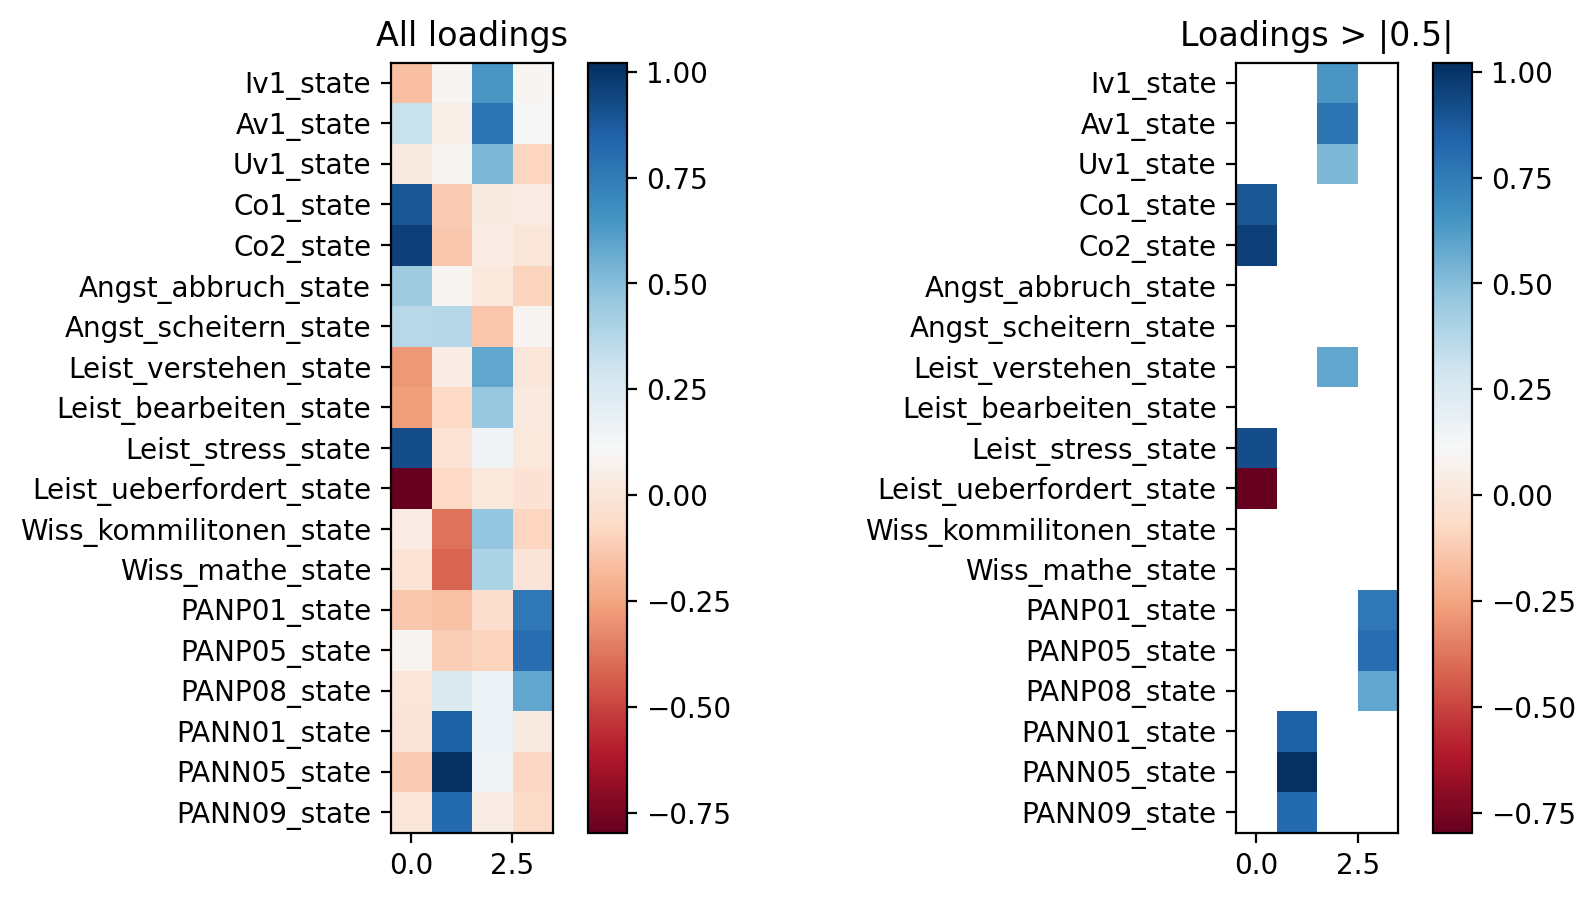

In [11]:
fa5 = FactorAnalyzer(rotation='promax', n_factors=4) 
fa5.fit(tx_data)
loadings5 = fa5.loadings_

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].set_title("All loadings")
pos = ax[0].imshow(loadings5, cmap='RdBu', interpolation='none');
ax[0].set_yticks(np.arange(0,19,1))
ax[0].set_yticklabels(tx.iloc[:,2:21].columns);
fig.colorbar(pos)

cutoff=0.5
l4m = np.ma.masked_array(loadings5, mask=np.abs(loadings5)<cutoff)
ax[1].set_title(f"Loadings > |{cutoff}|")
pos = ax[1].imshow(l4m, cmap='RdBu', interpolation='none');
ax[1].set_yticks(np.arange(0,19,1))
ax[1].set_yticklabels(tx.iloc[:,2:21].columns);
fig.colorbar(pos);
plt.show()

CFA Model

First I 

In [9]:
from semopy import Model, Optimizer
cfa_models = {} 
# Define the model syntax based on the 8 factors and their respective variables
cfa_model = """
# 1. Subjective importance of the content
Factor1 =~ Iv1_state + Av1_state + Uv1_state + Leist_verstehen_state + Leist_bearbeiten_state

# 2. Time-consuming (cost)
Factor2 =~ Co1_state + Co2_state

# 3. Intention to quit
Factor3 =~ Angst_abbruch_state + Angst_scheitern_state

# 4. Stress level
Factor4 =~ Leist_stress_state + Leist_ueberfordert_state

# 5. Positive affective state
Factor5 =~ PANP01_state + PANP05_state + PANP08_state

# 6. Negative affective state
Factor6 =~ PANN01_state + PANN05_state + PANN09_state

# 7. Self-assessment
Factor7 =~ Wiss_kommilitonen_state + Wiss_mathe_state
"""
# Traverse 50 datasets for CFA
for time, data in datasets_event0.items():
    model = Model(cfa_model)
    model.fit(data) 
    cfa_models[time] = model
    print(f"Time {time}, CFA Results:")
    print(model.inspect())


Time 8, CFA Results:
                       lval  op                     rval  Estimate  Std. Err  \
0                 Iv1_state   ~                  Factor1  1.000000         -   
1                 Av1_state   ~                  Factor1  0.342544  0.159995   
2                 Uv1_state   ~                  Factor1  0.431981  0.252553   
3     Leist_verstehen_state   ~                  Factor1  1.097213  0.213233   
4    Leist_bearbeiten_state   ~                  Factor1  0.925405   0.21647   
..                      ...  ..                      ...       ...       ...   
61             PANP05_state  ~~             PANP05_state  0.420919  0.098363   
62             PANP08_state  ~~             PANP08_state  0.569117  0.096233   
63                Uv1_state  ~~                Uv1_state  0.853064  0.135849   
64  Wiss_kommilitonen_state  ~~  Wiss_kommilitonen_state  0.143837  0.032594   
65         Wiss_mathe_state  ~~         Wiss_mathe_state  0.217254  0.049443   

     z-value   p-v

In [ ]:
from semopy import Model
cfa_models = {} 
# Define the model syntax based on the 8 factors and their respective variables
cfa_model = """
# 1. Subjective importance of the content
Factor1 =~ Iv1_state + Av1_state + Uv1_state + Leist_verstehen_state + Leist_bearbeiten_state

# 2. Time-consuming (cost)
Factor2 =~ Co1_state + Co2_state

# 3. Intention to quit
Factor3 =~ Angst_abbruch_state + Angst_scheitern_state

# 4. Stress level
Factor4 =~ Leist_stress_state + Leist_ueberfordert_state

# 5. Positive affective state
Factor5 =~ PANP01_state + PANP05_state + PANP08_state

# 6. Negative affective state
Factor6 =~ PANN01_state + PANN05_state + PANN09_state

# 7. Self-assessment
Factor7 =~ Wiss_kommilitonen_state + Wiss_mathe_state
""" 
latent_scores_all = pd.DataFrame()  

for time, data in datasets_event0.items():
    model = Model(cfa_model)  
    try:
        model.fit(data)  
        cfa_models[time] = model  

        latent_scores = model.predict_factors(data)  
        latent_scores['time'] = time  
        latent_scores_all = pd.concat([latent_scores_all, latent_scores]) 
    except Exception as e:
        print(f"Error fitting CFA for Time {time}: {e}")

latent_scores_all.reset_index(drop=True, inplace=True)
print(3latent_scores_all.head())

Error fitting CFA for Time 43: Singular matrix
Error fitting CFA for Time 57: Singular matrix
Error fitting CFA for Time 64: Singular matrix
Error fitting CFA for Time 73: Singular matrix
Error fitting CFA for Time 80: Singular matrix
Error fitting CFA for Time 85: Singular matrix
Error fitting CFA for Time 87: Singular matrix
Error fitting CFA for Time 89: Singular matrix
Error fitting CFA for Time 101: Singular matrix
Error fitting CFA for Time 106: Singular matrix
Error fitting CFA for Time 122: Singular matrix
Error fitting CFA for Time 127: Singular matrix
    Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  time
0 -0.214495  0.998351  0.819953  1.063706  0.241024  1.603269 -0.552911     8
1  0.459663 -0.403242 -0.543261 -0.615827  0.303634 -0.991183  0.439283     8
2  0.711413 -0.705002 -0.643189 -0.663328  0.384941 -1.222741  0.737122     8
3  0.510212 -0.539627 -0.495228 -0.790913  0.010993 -0.067916  0.272416     8
4 -0.316878  0.349779  0.245043  0.150468 

In [12]:
datasets_event0[64].head()

,Iv1_state,Av1_state,Uv1_state,Co1_state,Co2_state,Angst_abbruch_state,Angst_scheitern_state,Leist_verstehen_state,Leist_bearbeiten_state,Leist_stress_state,Leist_ueberfordert_state,Wiss_kommilitonen_state,Wiss_mathe_state,PANP01_state,PANP05_state,PANP08_state,PANN01_state,PANN05_state,PANN09_state
75,3.0,3.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0
194,2.0,2.0,1.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0
228,4.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0
263,3.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0
324,3.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,2.0


In [27]:
# the size of datasets_event0[problematic_times]
problematic_times = [64, 80, 85, 87, 101, 103, 106, 120, 122, 127, 129]

for time in problematic_times:
    print(datasets_event0[time].shape)

(41, 19)
(37, 19)
(45, 19)
(44, 19)
(37, 19)
(89, 19)
(40, 19)
(26, 19)
(25, 19)
(25, 19)
(20, 19)


In [38]:
selected_factors, actual_eigenvalues, critical_values = parallel_analysis(datasets_event0[64].to_numpy())

print("Selected factors based on parallel analysis:")
print(selected_factors)

Selected factors based on parallel analysis:
[ True  True  True  True False False False False False False False False
 False False False False False False False]


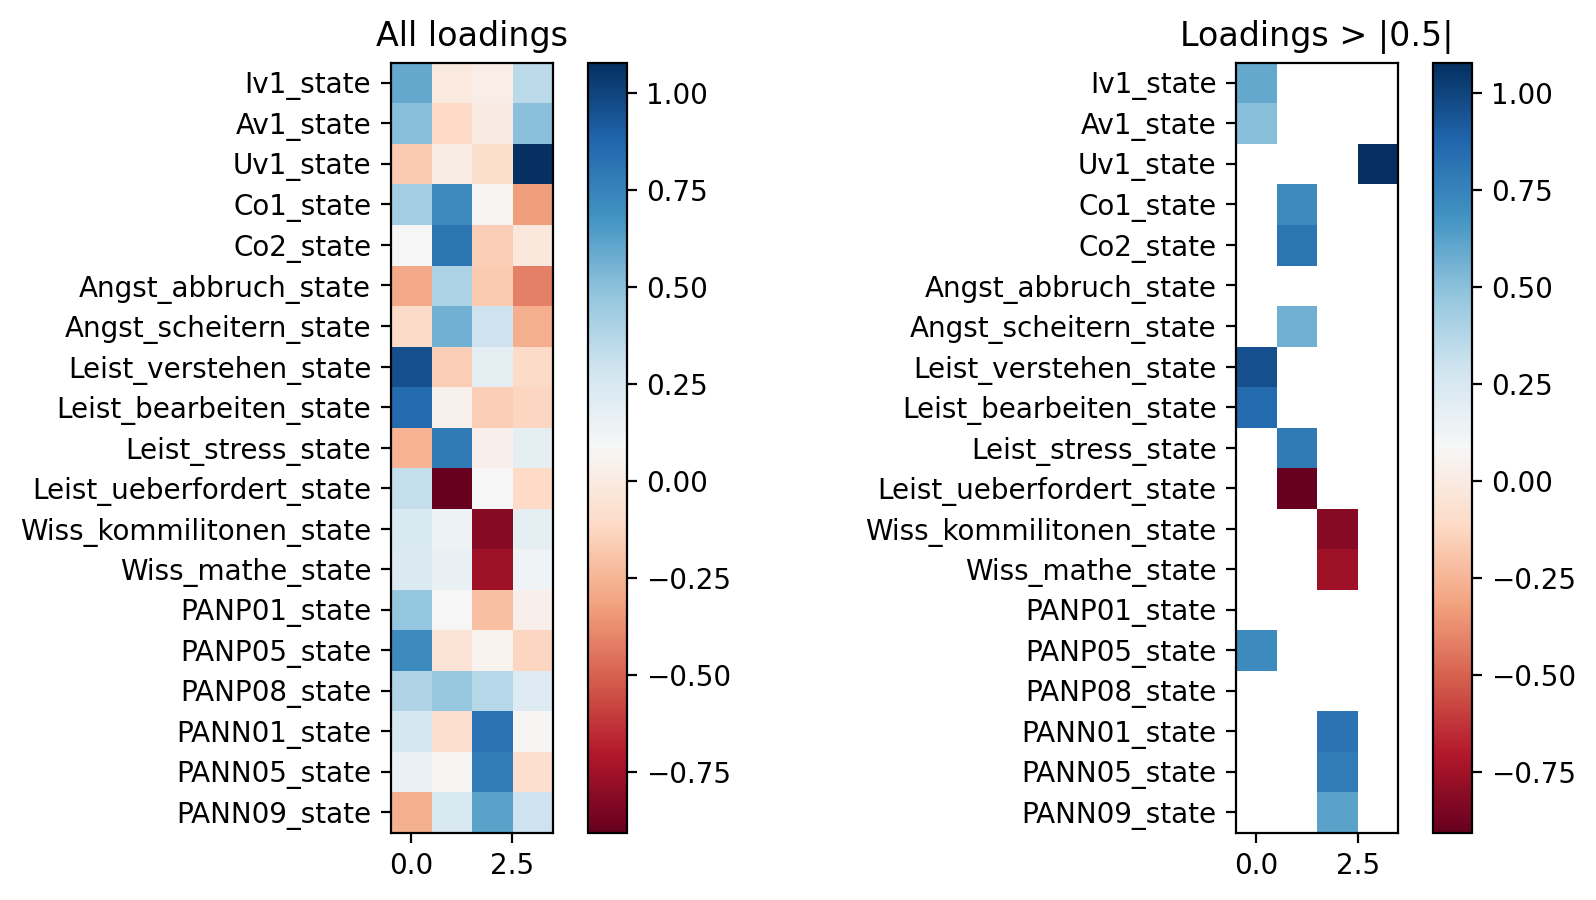

In [44]:
fa_64 = FactorAnalyzer(rotation='promax', n_factors=4) 
fa_64.fit(datasets_event0[129].to_numpy())
loadings64 = fa_64.loadings_

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].set_title("All loadings")
pos = ax[0].imshow(loadings64, cmap='RdBu', interpolation='none');
ax[0].set_yticks(np.arange(0,19,1))
ax[0].set_yticklabels(tx.iloc[:,2:21].columns);
fig.colorbar(pos)

cutoff=0.5
l4m = np.ma.masked_array(loadings64, mask=np.abs(loadings64)<cutoff)
ax[1].set_title(f"Loadings > |{cutoff}|")
pos = ax[1].imshow(l4m, cmap='RdBu', interpolation='none');
ax[1].set_yticks(np.arange(0,19,1))
ax[1].set_yticklabels(tx.iloc[:,2:21].columns);
fig.colorbar(pos);
plt.show()

In [10]:
from semopy import Model
import pandas as pd

# define the problematic times
problematic_times = [64, 80, 85, 87, 101, 103, 106, 120, 122, 127, 129]

# define the CFA model
cfa_model = """
# 1. Subjective importance of the content
Factor1 =~ Iv1_state + Av1_state + Uv1_state + Leist_verstehen_state + Leist_bearbeiten_state

# 2. Time-consuming (cost)
Factor2 =~ Co1_state + Co2_state

# 3. Intention to quit
Factor3 =~ Angst_abbruch_state + Angst_scheitern_state

# 4. Stress level
Factor4 =~ Leist_stress_state + Leist_ueberfordert_state

# 5. Positive affective state
Factor5 =~ PANP01_state + PANP05_state + PANP08_state

# 6. Negative affective state
Factor6 =~ PANN01_state + PANN05_state + PANN09_state

# 7. Self-assessment
Factor7 =~ Wiss_kommilitonen_state + Wiss_mathe_state
"""

# simplified CFA model
simplified_cfa_model = """
# 1. Subjective importance of the content
Factor1 =~ Iv1_state + Av1_state

# 2. Time-consuming (cost)
Factor2 =~ Co2_state + Leist_stress_state

# 3. Positive affective state
Factor3 =~ PANP05_state

# 4. Negative affective state
Factor4 =~ PANN05_state
"""
# fixed CFA model
fixed_cfa_model = """
Factor1 =~ 1*Iv1_state + 0.8*Av1_state + Uv1_state + Leist_verstehen_state + Leist_bearbeiten_state
Factor2 =~ Co1_state + Co2_state
Factor3 =~ 1*Angst_abbruch_state + Angst_scheitern_state
Factor4 =~ Leist_stress_state + Leist_ueberfordert_state
Factor5 =~ 1*PANP01_state + PANP05_state + PANP08_state
Factor6 =~ PANN01_state + PANN05_state + PANN09_state
Factor7 =~ Wiss_kommilitonen_state + Wiss_mathe_state

# fix the covariance maxrices
Factor1 ~~ 0*Factor2
Factor3 ~~ 0*Factor4
"""

latent_scores_all = pd.DataFrame()  
# save the models
cfa_models = {}

successful_times = []
failed_times = []

for time, data in datasets_event0.items():
    if time in problematic_times:
        model = Model(fixed_cfa_model)  
    else:
        model = Model(cfa_model)  
    
    # 尝试拟合模型
    try:
        model.fit(data, solver='L-BFGS-B')
        cfa_models[time] = model  
        latent_scores = model.predict_factors(data)  
        latent_scores['time'] = time  
        latent_scores_all = pd.concat([latent_scores_all, latent_scores]) 
        #successful_times.append(time)  
    except Exception as e:
        failed_times.append(time)  

latent_scores_all.reset_index(drop=True, inplace=True)
print(latent_scores_all.head())


    Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  time
0 -0.214632  0.998278  0.819836  1.063212  0.241396  1.603121 -0.553097     8
1  0.459749 -0.403177 -0.543104 -0.615530  0.304148 -0.991130  0.439413     8
2  0.711796 -0.704822 -0.643072 -0.663085  0.385717 -1.222653  0.737277     8
3  0.510567 -0.539527 -0.495210 -0.790639  0.010692 -0.067913  0.272530     8
4 -0.316868  0.349747  0.244901  0.150453  0.145937  0.794726 -0.018001     8


Check within-level dataset

## SEM Model

First choose within-level model: iq, bigfive, and math.

### Step 1: Between-level model

I choose math test and iq as the natent scores of the between-level model.

In [11]:
# load math_test data
math = pd.read_csv("./data/data_scales/T0/math_test.csv")
iq = pd.read_csv("./data/data_scales/T0/iq.csv")
# merge math_test and iq data
between_data = pd.merge(math, iq, on='studentID')
between_data.head()

,studentID,fw_pkt,iq
0,student1,9,116
1,student10,9,130
2,student100,13,113
3,student101,16,99
4,student102,7,106


### Step 2: compute nu_{it11}

In [ ]:
np.random.seed(42)

# γ ~ N(0,1)
gamma_1 = np.random.normal(0, 1)  
gamma_2 = np.random.normal(0, 1)  

# γ3j with 7 lagged terms  (used in lagged effects)
gamma_3 = np.random.normal(0, 1, size=7)  

gamma_4 = np.random.normal(0, 1, size=2)


In [13]:
# sort the latent scores by time
latent_scores_all = latent_scores_all.sort_values(by=['time'])

# add lagged latent scores
for factor in latent_scores_all.columns:
    if factor != 'time':  
        latent_scores_all[f'lag_{factor}'] = latent_scores_all[factor].shift(1)

latent_scores_all.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,time,lag_Factor1,lag_Factor2,lag_Factor3,lag_Factor4,lag_Factor5,lag_Factor6,lag_Factor7
0,-0.214632,0.998278,0.819836,1.063212,0.241396,1.603121,-0.553097,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,-0.014268,-0.814898,-0.406432,-0.258129,0.010966,-0.981000,0.423458,8,-0.214632,0.998278,0.819836,1.063212,0.241396,1.603121,-0.553097
57,-0.255775,0.164571,-0.217916,-0.352406,-0.097224,-0.134844,0.270852,8,-0.014268,-0.814898,-0.406432,-0.258129,0.010966,-0.981000,0.423458
56,-0.278848,-0.283621,-0.211309,-0.014455,0.129675,-0.835211,0.282654,8,-0.255775,0.164571,-0.217916,-0.352406,-0.097224,-0.134844,0.270852
55,-0.296005,0.582256,0.695673,1.108997,-0.069330,1.219198,-0.814648,8,-0.278848,-0.283621,-0.211309,-0.014455,0.129675,-0.835211,0.282654


Markov switching model: S_{it}

In [20]:
# initialize the dropout column
# create a new dataframe with the 1-2 and last column of the tx table
new_tx = tx[['studentID', 'meas', 'event']]
new_tx["S_it"] = np.nan
dropout_times = (
    new_tx[new_tx["event"] == 1]
    .groupby("studentID")["meas"]
    .min()
)

# Assign each student the value S_it = 2 (from dropout)
for student, dropout_time in dropout_times.items():
    new_tx.loc[
        (new_tx["studentID"] == student) & (new_tx["meas"] >= dropout_time),
        "S_it",
    ] = 2

# assign each student the value S_it = 1 (from non-dropout)
new_tx["S_it"].fillna(1, inplace=True)

# get the first and last column of the tx table
new_tx.head()



C:\Users\15524\AppData\Local\Temp\ipykernel_5216\3366570454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tx["S_it"] = np.nan
C:\Users\15524\AppData\Local\Temp\ipykernel_5216\3366570454.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_tx["S_it"].fillna(1, inplace=True)


,studentID,meas,event,S_it
0,student1,8,0,1.0
1,student1,10,0,1.0
2,student1,12,0,1.0
3,student1,15,0,1.0
4,student1,17,0,1.0


In [ ]:
def transition_probability(v_11):
    """ compute Markov transition probabilities """
    return np.exp(v_11) / (np.exp(v_11) + 1)

latent_states_df["P_S1_given_S1"] = transition_probability(latent_scores_all["v_it11"])
latent_states_df["P_S2_given_S1"] = 1 - latent_states_df["P_S1_given_S1"]

# P(S_it = 1 | S_{i,t-1} = 2) 
P12 = 0.05  
latent_states_df["P_S1_given_S2"] = P12
latent_states_df["P_S2_given_S2"] = 1 - P12

Between-level structural model

In [ ]:
import numpy as np
from scipy.stats import truncnorm

# set the seed
np.random.seed(42)


num_vars = 7  

# Step 1: set the initial values
alpha_21_s1 = np.random.normal(0, 1, num_vars)
beta_2_s1 = np.random.normal(0, 1, num_vars)
B_1_s1 = np.random.normal(0, 1, num_vars)
Omega_2_s1 = np.random.normal(0, 1, num_vars)

# Δα_21(s=2) ~ TN(0,1,0,∞)
a, b = 0, np.inf  
Delta_alpha_21_s2 = truncnorm.rvs(a, b, loc=0, scale=1, size=num_vars)

alpha_21_s2 = alpha_21_s1 + Delta_alpha_21_s2
Delta_beta_2_s2 = np.random.normal(0, 1, num_vars)
beta_2_s2 = beta_2_s1 + Delta_beta_2_s2


num_samples = tx['studentID'].nunique()
eta_2i = np.random.normal(0, 1, num_samples)
zeta_2i = np.random.normal(0, 1, (num_samples, num_vars))

# Step 3: AR(1) process
alpha_1is = alpha_21_s2 + beta_2_s2 * eta_2i[:, np.newaxis] + zeta_2i
B_1is = B_1_s1 + Omega_2_s1 * eta_2i[:, np.newaxis]

# print the results
print("Alpha_1is:\n", alpha_1is)
print("B_1is:\n", B_1is)


In [ ]:
dsem_formula = """
# Within-level AR(1) model for latent variables
Factor1[t] ~ alpha1 + B1 * lag_Factor1[t] + zeta1
Factor2[t] ~ alpha2 + B2 * lag_Factor2[t] + zeta2
Factor3[t] ~ alpha3 + B3 * lag_Factor3[t] + zeta3
Factor4[t] ~ alpha4 + B4 * lag_Factor4[t] + zeta4

# Between-level model
alpha1 ~ alpha21 + beta2 * Factor7_between + zeta2
B1 ~ B1s + Omega2 * Factor7_between

# Measurement model for each factor
Iv1_state ~ Factor1
Av1_state ~ Factor1
Uv1_state ~ Factor1
Co1_state ~ Factor2
Angst_abbruch_state ~ Factor3
Leist_stress_state ~ Factor4
"""
